### Задача 4.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from skimage import io
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from matplotlib import colors, pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

%matplotlib inline

#### Считаем данные и разделим их на train и test

In [2]:
DATA_DIR = Path('/home/egor/study/stats-2-sem/homeworks/hw4/scaled_images')
image_paths = sorted(list(DATA_DIR.rglob('*.jpg')))

In [3]:
def read_images(paths):
    data = [0 for _ in range(len(paths))]
    for path in paths:
        image_arr = plt.imread(path)
        index = int(str(path)[57:-4]) # беру только номер
        data[index - 1] = image_arr
    return data

In [4]:
data = np.array(read_images(image_paths))
train_labels_id = pd.read_csv('/home/egor/study/stats-2-sem/homeworks/hw4/train_labels.csv')

train_data = data[np.array(train_labels_id['id'] - 1)]
test_data = np.delete(data, np.array(train_labels_id['id'] - 1), axis=0)

#### Закодируем  labels в числа, что в будущем пригодится для обучения классификатора.

In [5]:
all_labels = list(train_labels_id['species'])
label_encoder = LabelEncoder().fit(all_labels)

train_labels = label_encoder.transform(train_labels_id['species'])

#### Напишем функцию для отображения изображений, и отобразим несколько

In [6]:
def imshow():
    fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
    for fig_x in ax.flatten():
        random_characters = int(np.random.uniform(0,990))
        im = train_data[random_characters]
        label = train_labels[random_characters]
        label = label_encoder.inverse_transform([label])[0]
        fig_x.imshow(im)
        fig_x.set_title(label)
        fig_x.grid(False)

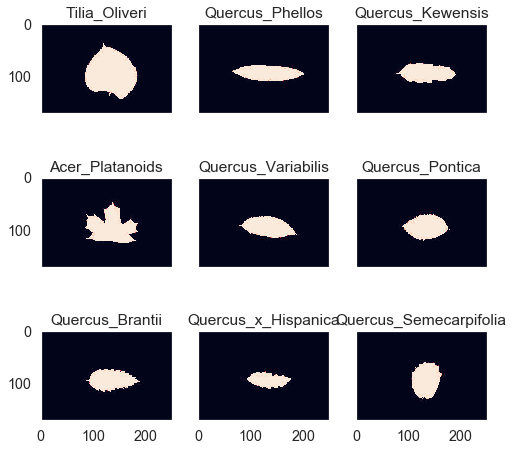

In [7]:
imshow()

#### Построим 30 главных компонент на train

In [8]:
n_comp = 30
pca = PCA(n_components=n_comp)
transform_data = pca.fit_transform(train_data.reshape((train_data.shape[0], -1)))

In [9]:
for i in range(1, n_comp + 1):
    print('{} компонента объясняет долю дисперсии {}'.format(i, pca.explained_variance_ratio_[i - 1]))

1 компонента объясняет долю дисперсии 0.28663545492998543
2 компонента объясняет долю дисперсии 0.13885536165479165
3 компонента объясняет долю дисперсии 0.08681788518767435
4 компонента объясняет долю дисперсии 0.046829110740890474
5 компонента объясняет долю дисперсии 0.027895727963623714
6 компонента объясняет долю дисперсии 0.02444946387667814
7 компонента объясняет долю дисперсии 0.018076703049110035
8 компонента объясняет долю дисперсии 0.014263225007393248
9 компонента объясняет долю дисперсии 0.011494328271954462
10 компонента объясняет долю дисперсии 0.010937785201545485
11 компонента объясняет долю дисперсии 0.010389201285514656
12 компонента объясняет долю дисперсии 0.009385623253845158
13 компонента объясняет долю дисперсии 0.008277581418611625
14 компонента объясняет долю дисперсии 0.0074884973708618345
15 компонента объясняет долю дисперсии 0.00727360760962518
16 компонента объясняет долю дисперсии 0.00632603075670854
17 компонента объясняет долю дисперсии 0.0056983683658

In [10]:
print('Суммарно компоненты объясняют долю дисперсии {}'.format(np.sum(pca.explained_variance_ratio_)))

Суммарно компоненты объясняют долю дисперсии 0.7764678047121414


#### Визуализируем главные компоненты

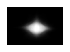

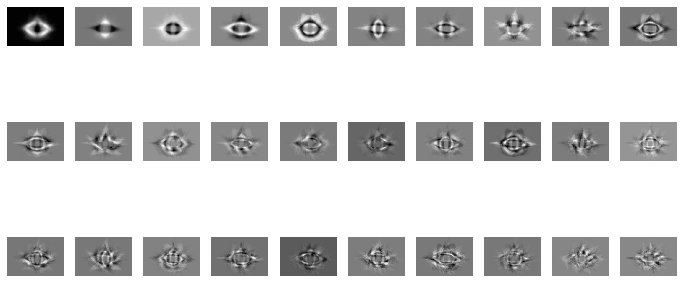

In [11]:
plt.figure(figsize=(1, 1))
plt.imshow(pca.mean_.reshape((170, 250)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
for i in range(n_comp):
    plt.subplot(n_comp / 10, n_comp / 3, i + 1)
    plt.imshow(pca.components_[i].reshape((170, 250)), cmap='gray')
    plt.axis('off')

По визуализации главных компонент можно заметить, что чем менее значима компонента (т.е. больше номер), тем более сложному рисунку она соответствует. Это логично, т.к. основные зависимости более важные.  
Также на примере первой строчке хорошо видны основные контуры различных листьев, на некоторых они выделены разными цветами - т.е. противопоставляются друг другу.

#### Визуализируем train в проекции на две первые главные компоненты.

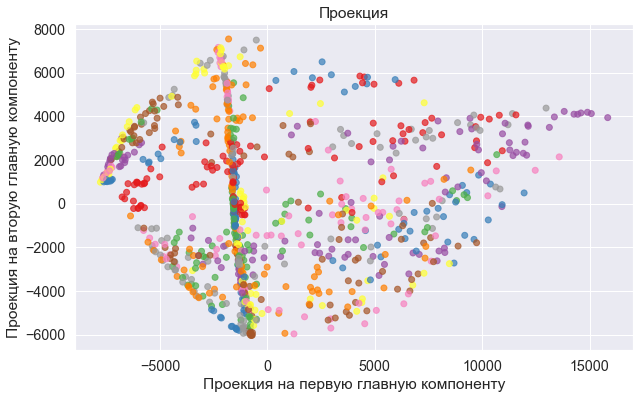

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(transform_data[:, 0], transform_data[:,1], alpha = 0.7, cmap='Set1', c = train_labels)
plt.title('Проекция')
plt.xlabel('Проекция на первую главную компоненту')
plt.ylabel('Проекция на вторую главную компоненту')
plt.show()

Видно, что проекция многих картинок на первую компоненту лежит примерно в одном диапазоне, т.е. для многих картинок проекция на первую компоненту не особо способстует отличению различных классов.  
При это видно, что чем больше значение проекции на первую компоненту, тем меньшее количество классов может иметь такую.

#### Визуализация t-SNE

In [14]:
from sklearn.manifold import TSNE

Обычный датасет, размерности $170 \cdot 250$

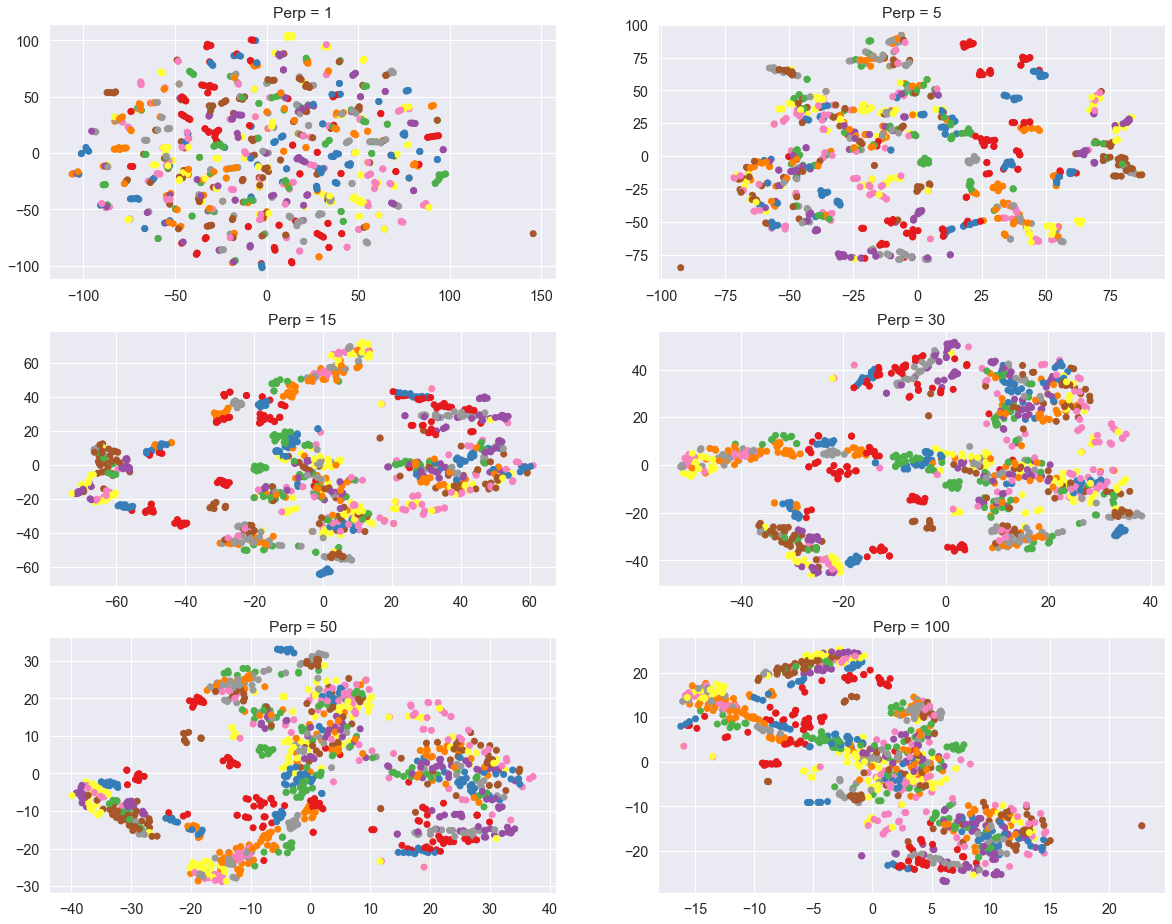

In [20]:
plt.figure(figsize=(20, 16))

for i, perplexity in enumerate([1, 5, 15, 30, 50, 100]):
    plt.subplot(3, 2, i + 1)
    original_tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = original_tsne.fit_transform(train_data.reshape((train_data.shape[0], -1)))
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_labels, cmap='Set1')
    plt.title('Perp = {}'.format(perplexity))
plt.show()

Преобразованный с помощью PCA датасет, размерности 30

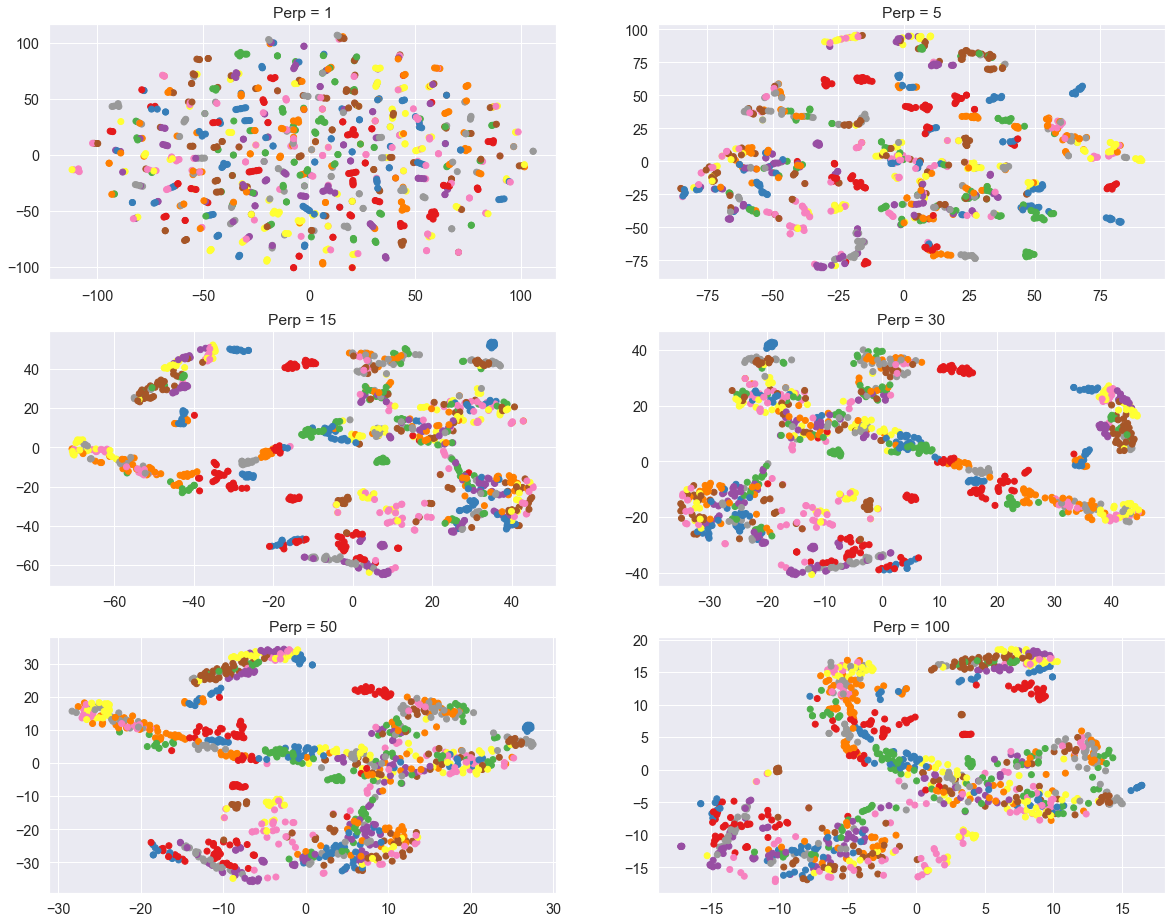

In [35]:
plt.figure(figsize=(20, 16))

for i, perplexity in enumerate([1, 5, 15, 30, 50, 100]):
    plt.subplot(3, 2, i + 1)
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(transform_data)
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_labels, cmap='Set1')
    plt.title('Perp = {}'.format(perplexity))
    
plt.show()

Заметим, что в обоих случаях (если смотреть на графики) TSNE не смог кластеризовать данные.  
Посмотрев описание cmap=set1 можно увидеть, что в данном set-е используются всего 9 цветов, поэтому различные сгустки точек, нарисованные одним цветом, могут быть различными классами.  
Проверим на обоих датасетах, визуализируя рандомные 9 классов (по количеству цветов в cmap='set1')

Исходные

In [36]:
classes = np.random.randint(0, np.max(train_labels), 9)

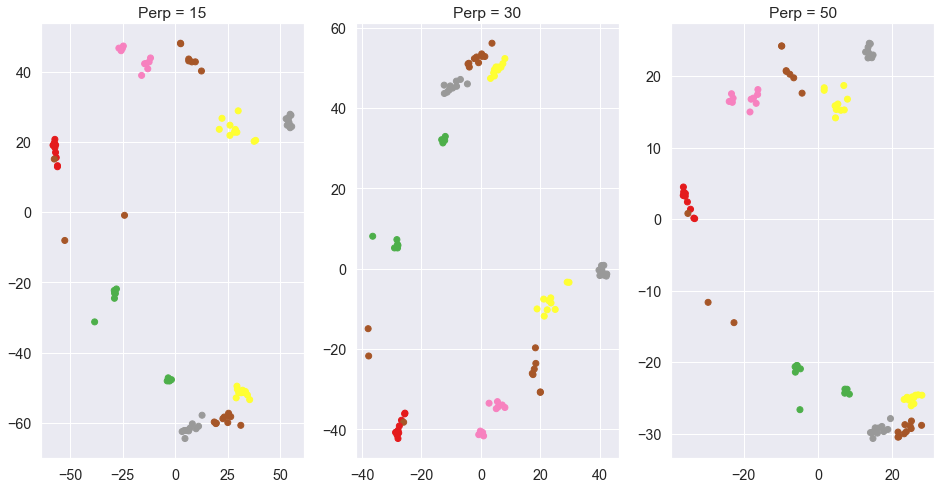

In [44]:
plt.figure(figsize=(16, 8))

for i, perplexity in enumerate([15, 30, 50]):
    plt.subplot(1, 3, i + 1)
    original_tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = original_tsne.fit_transform(train_data.reshape((train_data.shape[0], -1)))[np.isin(train_labels, classes)]
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_labels[np.isin(train_labels, classes)], cmap='Set1')
    plt.title('Perp = {}'.format(perplexity))
plt.show()

Проекции

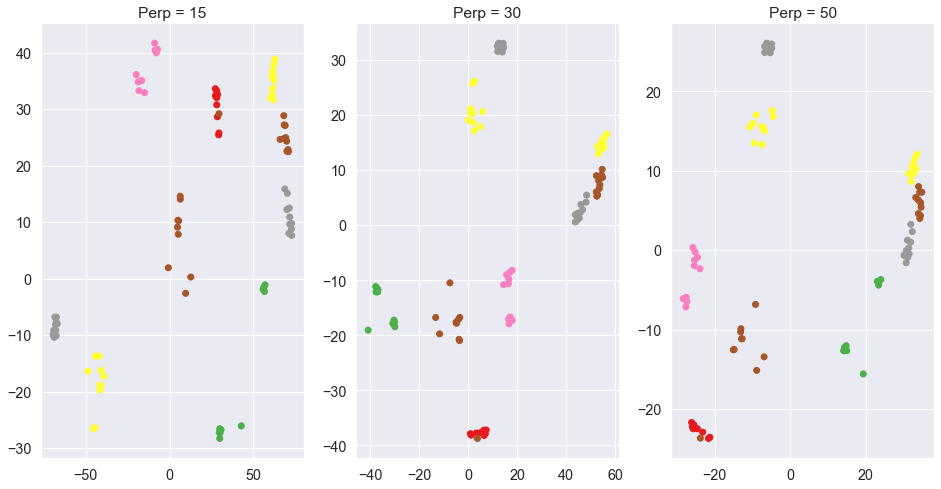

In [43]:
plt.figure(figsize=(16, 8))

for i, perplexity in enumerate([15, 30, 50]):
    plt.subplot(1, 3, i + 1)
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(transform_data)[np.isin(train_labels, classes)]
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_labels[np.isin(train_labels, classes)], cmap='Set1')
    plt.title('Perp = {}'.format(perplexity))
    
plt.show()

Теперь видно, что TSNE хорошо кластеризуют точки из выборки.  
***Вывод:*** не стоит визуализировать выборку, в которой представлены объекты огромного числа классов (в нашем случае - 100). Из-за ограниченного количества цветов (или же похожести разных оттенков) глазами мы не сможем понять, насколько хорошо происходит кластеризация.  
Если визуализировать - нужно выбирать ограниченное число классов, так будет более наглядно.  
Но стоит отметить, что при переходе в более низкую размерность с помощью PCA кластеризация с помощью TSNE работает лучше.

#### Обучим многоклассовую классификацию

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [50]:
X_train, X_val, y_train, y_val = train_test_split(transform_data, train_labels, test_size=0.3, random_state=17)

In [51]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_val = scaler.transform(X_val)

In [52]:
logreg_gridsearch = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid={'penalty': ['l2', 'none'],
                    'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]},
        n_jobs=-1
        )

logreg_gridsearch.fit(scaled_train, y_train)
print('best params: ', logreg_gridsearch.best_params_)
acc = accuracy_score(logreg_gridsearch.best_estimator_.predict(scaled_val), y_val)
print('accuracy_score_val:', acc)

best params:  {'C': 5, 'penalty': 'l2'}
accuracy_score_val: 0.5656565656565656


Выше мы получили лучшую модель линейной регрессии  
Рассмотрим на test, насколько хорошо предсказывает наша модель.  
Только вероятностей для этого не хватит, поэтому будет предсказывать и argmax.

Для лучшего понимания, насколько хорошо предсказывает модель, соберем по одному примеру картинки для каждого класса

In [53]:
def get_examples():
    '''
    Возвращает список, i-й элемент -- представитель i-го класса.
    '''
    all_labels = np.unique(train_labels)
    images = []
    for label in all_labels:
        k = np.argwhere(train_labels == label)[0][0]
        im = train_data[k]
        images.append(im)
    return images

In [54]:
examples_per_classes = get_examples()

Посчитаем вероятности

In [65]:
model = logreg_gridsearch.best_estimator_
transform_test = pca.transform(test_data.reshape((test_data.shape[0], -1)))
prob_test = model.predict_proba(scaler.transform(transform_test))
pred_test = model.predict(scaler.transform(transform_test))
prob_test

array([[9.55940053e-08, 6.47453073e-04, 1.66952809e-04, ...,
        1.26831286e-01, 4.10148939e-06, 6.41503159e-05],
       [9.44824477e-05, 4.87795628e-05, 5.10061739e-06, ...,
        5.05993583e-05, 1.08011599e-04, 1.71922121e-02],
       [9.60883716e-06, 6.12846656e-01, 3.39744036e-06, ...,
        5.07206128e-04, 7.46078529e-06, 9.81321889e-04],
       ...,
       [2.73195315e-08, 4.21685828e-06, 8.67528640e-06, ...,
        3.52829001e-07, 2.10684741e-08, 2.26529881e-07],
       [4.56461607e-06, 2.21295976e-05, 1.54224740e-06, ...,
        1.84938305e-02, 3.92642329e-07, 1.45434547e-06],
       [8.63726857e-12, 1.72640326e-09, 6.26323240e-11, ...,
        3.79308289e-08, 2.73761387e-12, 6.97662010e-08]])

Для наглядности визуализируем объект, предсказанный ему класс, а также один из примеров настоящих объектов данного класса

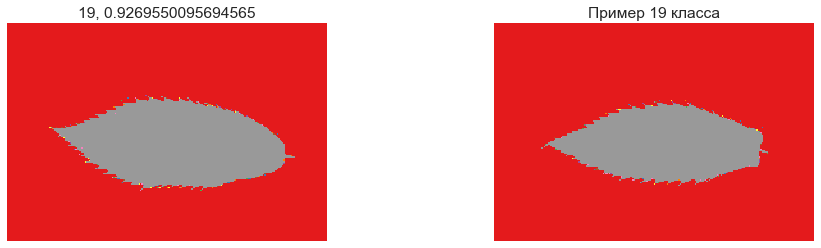

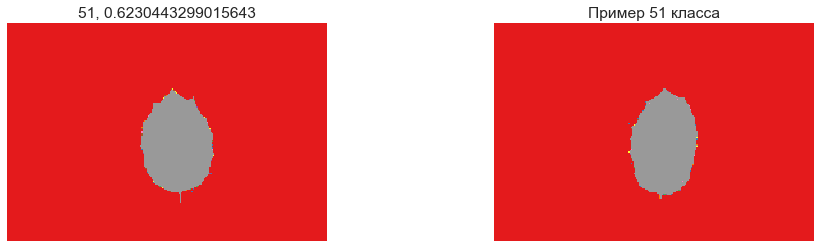

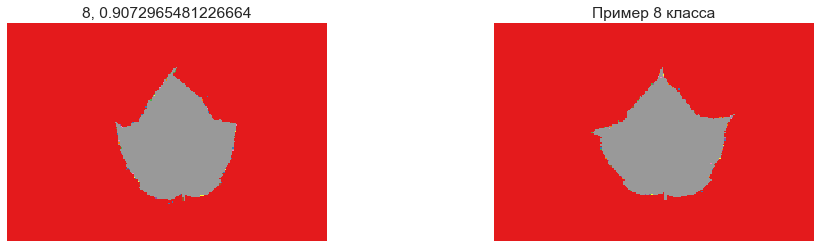

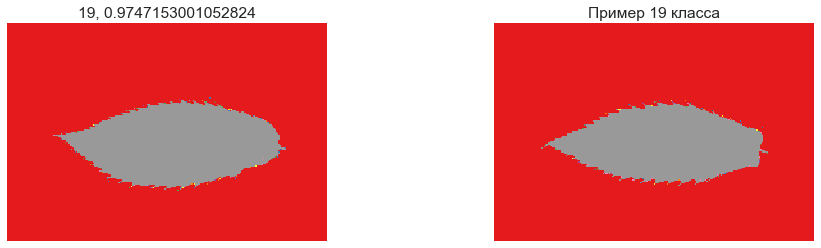

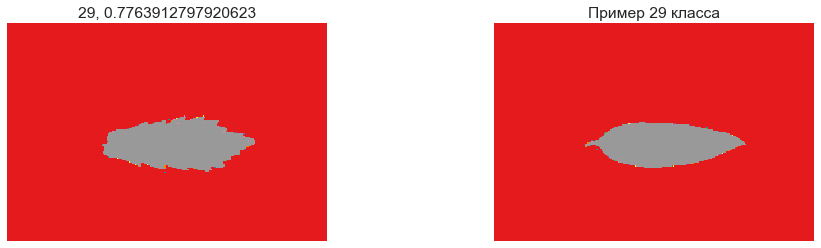

In [67]:
for _ in range(5):
    ind = int(np.random.uniform(0,test_data.shape[0]))
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(test_data[ind].reshape((170, 250)), cmap='Set1')
    plt.axis('off')
    plt.title(str(pred_test[ind]) + ', ' + str(np.max(prob_test[ind])))
    
    plt.subplot(1, 2, 2)
    plt.imshow(examples_per_classes[pred_test[ind]], cmap='Set1')
    plt.axis('off')
    plt.title('Пример {} класса'.format(pred_test[ind]))

Как видно, наша модель действительно дает адекватные предсказания, взглянув на картинки можно заметить это.  
Понятно, что обучив регрессию на начальных данных, у нас бы получился гораздо более плохой результат.